# MA 641 - Time Series Analysis - 2023
## Supervisor - Prof. Hadi Safari Katesari 
## by Simoni Patani

### Non - Seasonal Data - Blackstone Stocks Data

This is the non-seasonal time series project, where we are looking into the stock price data of Blackstone from November 6, 2018, to October 30, 2023. This project aims to understand the underlying patterns, trends, and dependencies within the stock prices and make predictions for future movements.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import numpy as np 
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import arch
import warnings 
warnings.filterwarnings("ignore")

data = pd.read_csv('BX.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None


In [107]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-06,33.849998,34.919998,33.830002,34.279999,28.195650,5358300
1,2018-11-07,34.540001,35.180000,34.509998,35.169998,28.927683,4290100
2,2018-11-08,34.900002,35.779999,34.639999,35.349998,29.075733,3258900
3,2018-11-09,34.970001,35.080002,33.740002,33.990002,27.957125,4861000
4,2018-11-12,33.849998,34.139999,32.980000,33.189999,27.299114,3716500


In [108]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-10-30,90.620003,92.940002,90.440002,92.379997,92.379997,4067900
1253,2023-10-31,92.449997,92.629997,91.139999,92.349998,92.349998,2809700
1254,2023-11-01,92.720001,94.900002,91.760002,94.750000,94.750000,3922800
1255,2023-11-02,97.230003,98.410004,96.680000,98.199997,98.199997,4178300
1256,2023-11-03,99.589996,101.550003,99.470001,100.900002,100.900002,4573300


In [109]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean     77.580104    78.798886    76.399809    77.651925    71.573130   
std      30.203541    30.695821    29.670770    30.186721    30.017293   
min      27.510000    27.920000    26.879999    27.600000    22.701279   
25%      52.529999    53.189999    52.020000    52.630001    45.442722   
50%      78.209999    79.769997    77.300003    78.730003    73.957397   
75%     100.000000   101.980003    98.519997    99.730003    96.416946   
max     149.669998   149.779999   146.089996   148.880005   137.397568   

             Volume  
count  1.257000e+03  
mean   4.635499e+06  
std    4.705385e+06  
min    6.055000e+05  
25%    2.779300e+06  
50%    3.731300e+06  
75%    5.232600e+06  
max    1.173491e+08  


In [110]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [111]:
sns.set(style="whitegrid")

In [112]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [113]:
# Data Visualisation

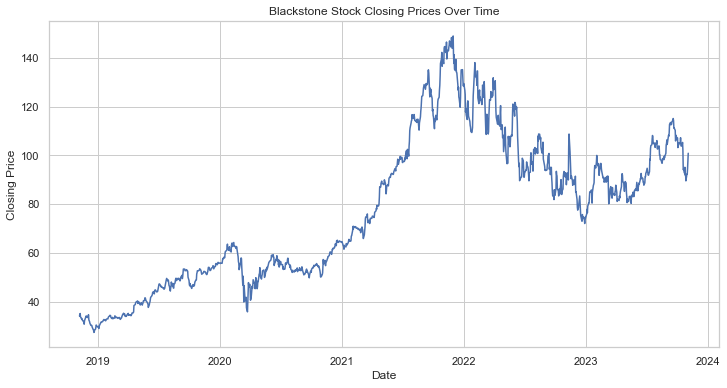

In [114]:
# Line plot of Closing Prices over time

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=data)
plt.title('Blackstone Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [115]:
# Check if the dataset is stationary using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -1.5977580350538712
p-value: 0.4847195960730429
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


### Data is not stationary as p-value > 0.05, so we make the data stationary by differencing 

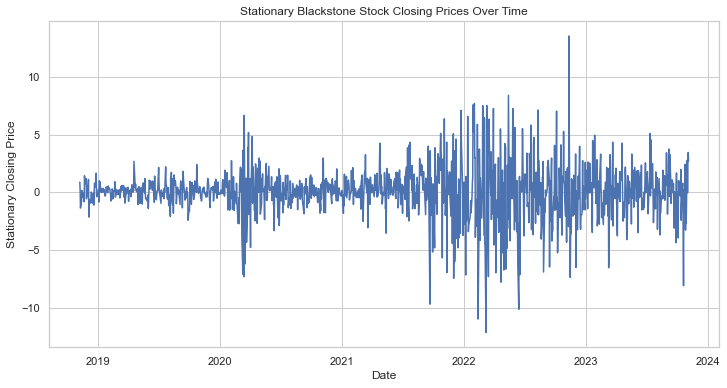

In [116]:
if result[1] > 0.05:
    # Make the dataset stationary by taking the first difference
    stationary_close =  data['Close'].diff().dropna()
    data['Stationary_Close'] = data['Close'].diff().dropna()
    #Plot the stationary time series
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=data.index, y=data['Stationary_Close'])
    plt.title('Stationary Blackstone Stock Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stationary Closing Price')
    plt.show()
else:
    print("The dataset is already stationary.")  

In [117]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(stationary_close)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -33.989778502336314
p-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


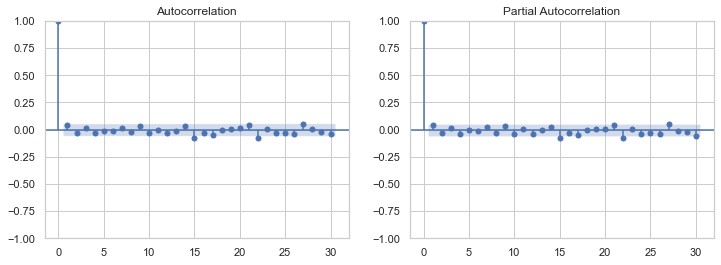

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(stationary_close, lags=30, ax=ax1)
plot_pacf(stationary_close, lags=30, ax=ax2)

plt.show()

AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots are created to identify potential lag values for ARIMA model parameters.

# Find Best Model

In [119]:
from statsmodels.tsa.arima.model import ARIMA

d=1
# Range of p and q values to iterate over
p_values = range(0, 4)  
q_values = range(0, 4) 

best_aic = float('inf')
best_bic = float('inf')
best_params = None

# Grid search for ARIMA parameters
for p in p_values:
    for q in q_values:
        order = (p, d, q)
        model = ARIMA(data['Stationary_Close'], order=order).fit()
        aic = model.aic
        bic = model.bic
        
        # Compare AIC and BIC to find the best-fit model
        if aic < best_aic and bic < best_bic:
            best_aic = aic
            best_bic = bic
            best_params = order

print(f'Best ARIMA Model Parameters (p, d, q): {best_params}')
print(f'Best AIC: {best_aic}')
print(f'Best BIC: {best_bic}')

# Fit the best model
best_model = ARIMA(data['Stationary_Close'], order=best_params).fit()

Best ARIMA Model Parameters (p, d, q): (0, 1, 1)
Best AIC: 5556.1149751791945
Best BIC: 5566.386349873251


### Best ARIMA Model Parameters (p, d, q): (0, 1, 1)
Through an iterative process, the best ARIMA model is identified as (0, 1, 1) with the lowest AIC and BIC values, indicating a balance between model fit and complexity.

## Residual Analysis

                               SARIMAX Results                                
Dep. Variable:       Stationary_Close   No. Observations:                 1256
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2768.231
Date:                Sun, 17 Dec 2023   AIC                           5540.462
Time:                        18:46:39   BIC                           5550.731
Sample:                             0   HQIC                          5544.322
                               - 1256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.027    -36.665      0.000      -1.053      -0.946
sigma2         4.7975      0.175     27.376      0.000       4.454       5.141
Ljung-Box (L1) (Q):                   2.02   Jarque-

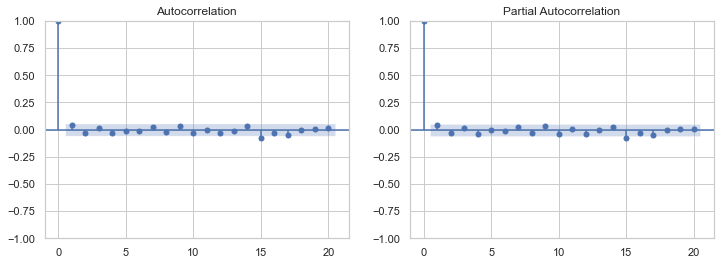

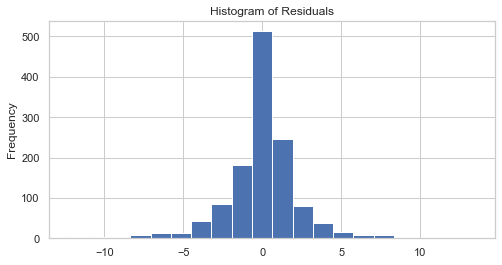

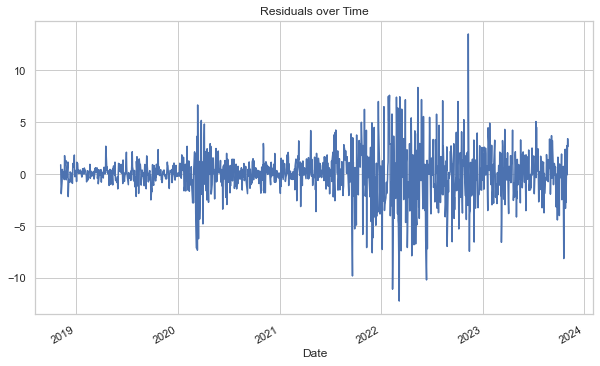

In [120]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit ARIMA(0, 1, 1) model
model = sm.tsa.ARIMA(data['Stationary_Close'].dropna(), order=(0, 1, 1)).fit()

# Residual analysis
residuals = model.resid

# Summary of the model
print(model.summary())

# Plot ACF and PACF of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=ax2)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 4))
residuals.plot(kind='hist', bins=20, title='Histogram of Residuals')
plt.show()

# Plot the residuals over time
plt.figure(figsize=(10, 6))
residuals.plot(title='Residuals over Time')
plt.show()



In [121]:
# Ljung-Box test for autocorrelation in residuals
ljung_box = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test p-value:", ljung_box.loc[10, 'lb_pvalue'])


Ljung-Box test p-value: 0.5036093777548153



Null Hypothesis (H0): There is no autocorrelation in the residuals up to the specified lag.

Alternative Hypothesis (H1): There is significant autocorrelation in the residuals up to the specified lag.

No significant evidence of autocorrelation in the residuals as p-value of Ljung-Box text higher than 0.05. Fail to reject null hypothesis 


### Hyperparameter Tuning for best ARIMA Model 



In [122]:
# Split the data into training and testing sets
train, test = train_test_split(data['Close'], train_size=0.8)

# Define the range of hyperparameter values to search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Initialize variables to store the best model and its performance
best_model1 = None
best_rmse = np.inf  # Initialize with a large value

# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            # Fit ARIMA model
            model = pm.ARIMA(order=(p, d, q))
            try:
                model.fit(train)
            except Exception as e:
                continue

            # Make predictions on the test set
            predictions = model.predict(test.shape[0])

            # Evaluate the model using RMSE
            rmse = np.sqrt(mean_squared_error(test, predictions))

            # Update the best model if the current one is better
            if rmse < best_rmse:
                best_rmse = rmse
                best_model1 = model

# Print the best model's hyperparameters
print("Best ARIMA Model Hyperparameters:", best_model1.order)

# Fit the best model on the entire dataset
final_model1 = pm.ARIMA(order=best_model1.order)
final_model1.fit(data['Close'])



Best ARIMA Model Hyperparameters: (2, 1, 0)


ARIMA(order=(2, 1, 0))

## Residual Analysis for ARIMA(2,1,0)

                               SARIMAX Results                                
Dep. Variable:       Stationary_Close   No. Observations:                 1256
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2939.311
Date:                Sun, 17 Dec 2023   AIC                           5884.622
Time:                        18:46:43   BIC                           5900.027
Sample:                             0   HQIC                          5890.412
                               - 1256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6263      0.017    -36.005      0.000      -0.660      -0.592
ar.L2         -0.3504      0.015    -22.720      0.000      -0.381      -0.320
sigma2         6.3336      0.147     42.971      0.0

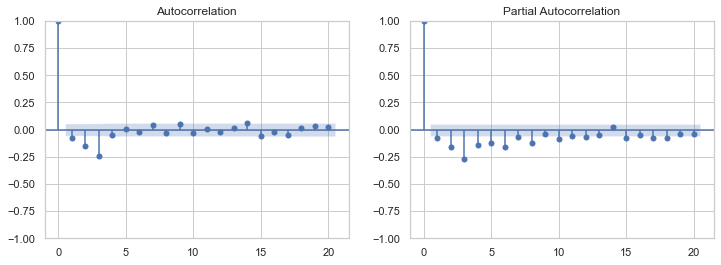

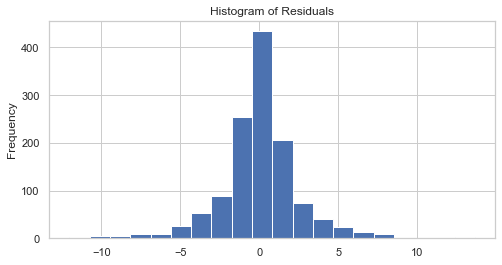

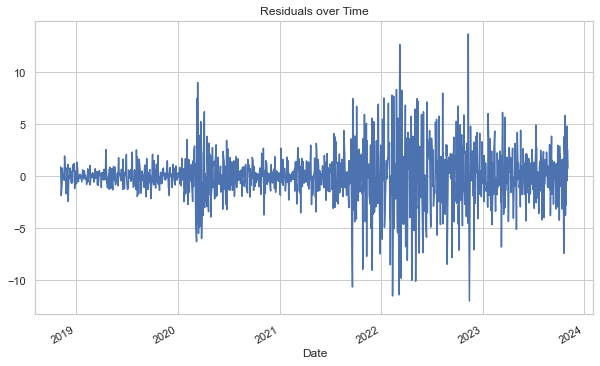

In [123]:
# Fit ARIMA(2, 1, 0) model
model1 = sm.tsa.ARIMA(data['Stationary_Close'].dropna(), order=(2, 1, 0)).fit()

# Residual analysis
residuals1 = model1.resid

# Summary of the model
print(model1.summary())

# Plot ACF and PACF of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(residuals1, lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(residuals1, lags=20, ax=ax2)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 4))
residuals1.plot(kind='hist', bins=20, title='Histogram of Residuals')
plt.show()

# Plot the residuals over time
plt.figure(figsize=(10, 6))
residuals1.plot(title='Residuals over Time')
plt.show()

In [124]:
ljung_box1 = sm.stats.acorr_ljungbox(residuals1, lags=[10], return_df=True)
print("Ljung-Box test p-value:", ljung_box1.loc[10, 'lb_pvalue'])

Ljung-Box test p-value: 7.141402479844153e-21


### Despite initial findings, I tried attempting hyperparameter tuning. However, the resulting model (2, 1, 0) fails to capture dependencies in the residuals, as indicated by ACF and PACF plots and a low p-value in the Ljung-Box test.

Null Hypothesis (H0): There is no autocorrelation in the residuals up to the specified lag.

Alternative Hypothesis (H1): There is significant autocorrelation in the residuals up to the specified lag.

As p-value of Ljung-Box text higher than 0.05, we reject null hypothesis. There is significant autocorrelation in the residuals up to the specified lag.

Thus, ARIMA(2,1,0) is not the best model for our time series

## We can conclude that ARIMA(1,1,0) is the best model for our time series

## Forecasting on ARIMA(1,1,0)

In [143]:
# Fit the ARIMA model with the best parameters
best_order = (0, 1, 1)
model = ARIMA(data['Stationary_Close'], order=best_order)
best_model = model.fit()
forecast_horizon = 60
forecast_values = best_model.get_forecast(steps=forecast_horizon)

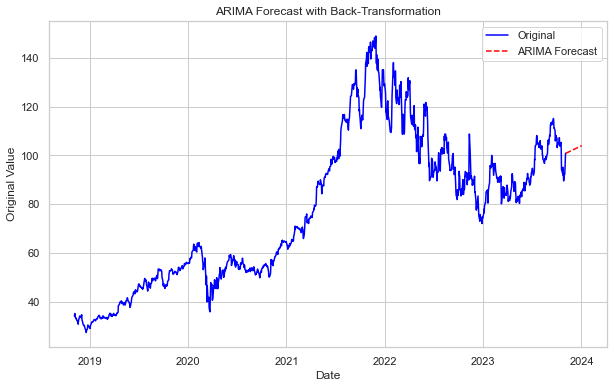

In [126]:
last_observation = data['Close'].iloc[-1]
forecast_values_original = np.cumsum(np.insert(forecast_values.predicted_mean.values, 0, last_observation))

# Create a DataFrame with forecasted values and corresponding dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=forecast_horizon)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_ARIMA': forecast_values_original[:forecast_horizon]})

# Plot the original time series and ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Forecast_ARIMA'], label='ARIMA Forecast', color='red', linestyle='dashed')
plt.title('ARIMA Forecast with Back-Transformation')
plt.xlabel('Date')
plt.ylabel('Original Value')
plt.legend()
plt.show()


In [127]:
# Print the forecasted values
print(forecast_df)

         Date  Forecast_ARIMA
0  2023-11-04      100.900002
1  2023-11-05      100.952826
2  2023-11-06      101.005650
3  2023-11-07      101.058474
4  2023-11-08      101.111298
5  2023-11-09      101.164122
6  2023-11-10      101.216946
7  2023-11-11      101.269769
8  2023-11-12      101.322593
9  2023-11-13      101.375417
10 2023-11-14      101.428241
11 2023-11-15      101.481065
12 2023-11-16      101.533889
13 2023-11-17      101.586713
14 2023-11-18      101.639537
15 2023-11-19      101.692361
16 2023-11-20      101.745185
17 2023-11-21      101.798009
18 2023-11-22      101.850833
19 2023-11-23      101.903656
20 2023-11-24      101.956480
21 2023-11-25      102.009304
22 2023-11-26      102.062128
23 2023-11-27      102.114952
24 2023-11-28      102.167776
25 2023-11-29      102.220600
26 2023-11-30      102.273424
27 2023-12-01      102.326248
28 2023-12-02      102.379072
29 2023-12-03      102.431896
30 2023-12-04      102.484720
31 2023-12-05      102.537543
32 2023-12

### GARCH Model
Next, we try different types of GARCH Model for our time series:

In [128]:
## Garch(1,1)

# Split the data into training and testing sets
train, test = train_test_split(data['Close'], train_size=0.8)

# Fit GARCH model
garch_model = arch.arch_model(train, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 33910.344376731184
Iteration:      2,   Func. Count:     13,   Neg. LLF: 515658687595.3401
Iteration:      3,   Func. Count:     20,   Neg. LLF: 13671597.262780432
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4394.720925250705
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4134.3988543950345
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4636.225708439725
Iteration:      7,   Func. Count:     50,   Neg. LLF: 4598.15574023312
Iteration:      8,   Func. Count:     57,   Neg. LLF: 4105.645420502031
Iteration:      9,   Func. Count:     63,   Neg. LLF: 4095.5482867469536
Iteration:     10,   Func. Count:     68,   Neg. LLF: 4092.896348264092
Iteration:     11,   Func. Count:     73,   Neg. LLF: 4090.7823140272258
Iteration:     12,   Func. Count:     78,   Neg. LLF: 4090.5626857760367
Iteration:     13,   Func. Count:     83,   Neg. LLF: 4090.5343730174254
Iteration:     14,   Func. Count:     88,   Neg. LLF: 4090

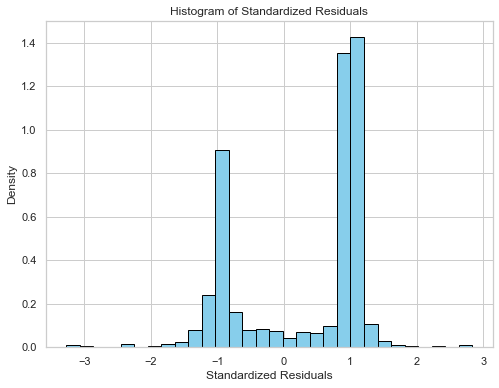

In [129]:
# Get standardized residuals from the final GARCH model
standardized_residuals = garch_results.resid / garch_results.conditional_volatility

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(standardized_residuals, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel('Density')
plt.show()


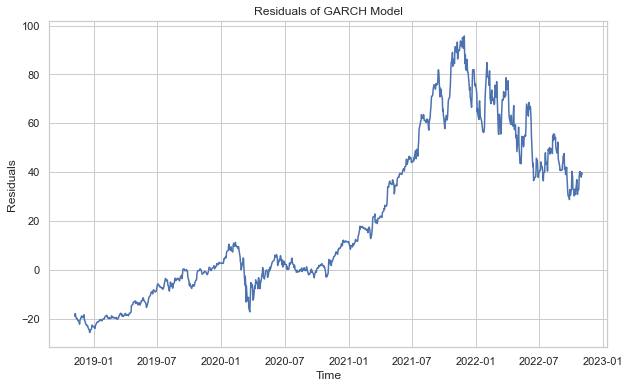

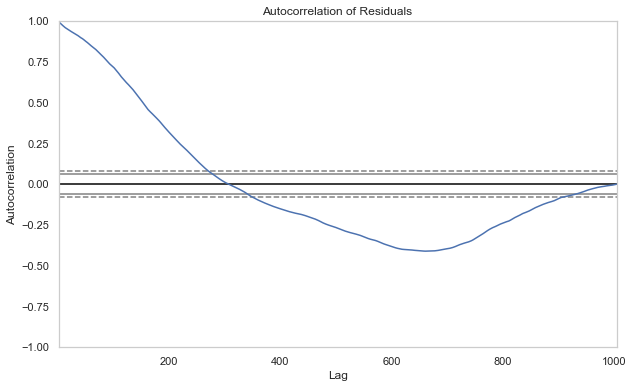

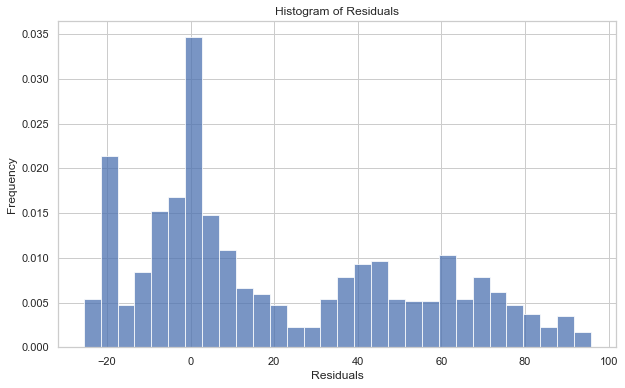

In [130]:
residuals = garch_results.resid

# Plot the residuals over time
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of GARCH Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Plot the ACF (Autocorrelation Function) of the residuals
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.75)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [131]:
# We perform Grid Search to find Best GARCH model

train, test = train_test_split(data['Close'], train_size=0.8)

# Define the range of hyperparameter values to search
p_values = range(1, 3)  
q_values = range(0, 3)

# Initialize variables to store the best model and its performance
best_model = None
best_aic = np.inf  # Initialize with a large value

# Perform grid search
for p in p_values:
    for q in q_values:
        # Fit GARCH model
        garch_model = arch.arch_model(train, vol='Garch', p=p, q=q)
        garch_results = garch_model.fit(disp='off')

        # Calculate AIC and BIC
        aic = garch_results.aic
        bic = garch_results.bic

        # Update the best model if the current one is better
        if aic < best_aic:
            best_aic = aic
            best_model = (p, q)

        print(f"GARCH({p}, {q}) - AIC: {aic}, BIC: {bic}")

# Print the best model's hyperparameters
print("Best GARCH Model Hyperparameters:", best_model)


GARCH(1, 0) - AIC: 8198.62908973757, BIC: 8213.367318199049
GARCH(1, 1) - AIC: 8189.054814595416, BIC: 8208.70578587739
GARCH(1, 2) - AIC: 8190.416712731401, BIC: 8214.980426833867
GARCH(2, 0) - AIC: 8189.821934002199, BIC: 8209.472905284172
GARCH(2, 1) - AIC: 8191.054814600435, BIC: 8215.6185287029
GARCH(2, 2) - AIC: 8192.157228234075, BIC: 8221.633685157032
Best GARCH Model Hyperparameters: (1, 1)


## Best GARCH Model Hyperparameters: (1, 1)

## Next, we do forecasting on the GARCH Model(1,1) 

In [137]:
# Forecast volatility for the test set
volatility_forecast = garch_results.conditional_volatility[-1:]

# Generate random normal innovations for forecasting returns
innovations = np.random.normal(0, 1, size=60)

# Forecast future returns using the GARCH model
return_forecast = np.sqrt(volatility_forecast.values[-1]) * innovations

# Generate forecasted prices
forecast_prices = data['Close'].iloc[-1] + np.cumsum(return_forecast)

# Print the forecasted values
forecast_df_garch = pd.DataFrame({'Date': pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=60), 'Forecast_GARCH': forecast_prices})
print(forecast_df_garch)


         Date  Forecast_GARCH
0  2023-11-04      113.167001
1  2023-11-05      123.730290
2  2023-11-06      126.104554
3  2023-11-07      120.219368
4  2023-11-08      125.520975
5  2023-11-09      125.020319
6  2023-11-10      119.896842
7  2023-11-11      107.288526
8  2023-11-12       97.409497
9  2023-11-13       96.282853
10 2023-11-14       98.823502
11 2023-11-15      105.652662
12 2023-11-16      100.759499
13 2023-11-17      117.226251
14 2023-11-18      122.051611
15 2023-11-19      118.346686
16 2023-11-20      116.791879
17 2023-11-21      112.908750
18 2023-11-22      112.577443
19 2023-11-23      115.129555
20 2023-11-24      111.919640
21 2023-11-25      110.522006
22 2023-11-26      104.746440
23 2023-11-27       91.487719
24 2023-11-28       91.170371
25 2023-11-29      107.500738
26 2023-11-30      105.203030
27 2023-12-01      106.791129
28 2023-12-02      107.920797
29 2023-12-03      114.467449
30 2023-12-04      118.380711
31 2023-12-05      115.391167
32 2023-12

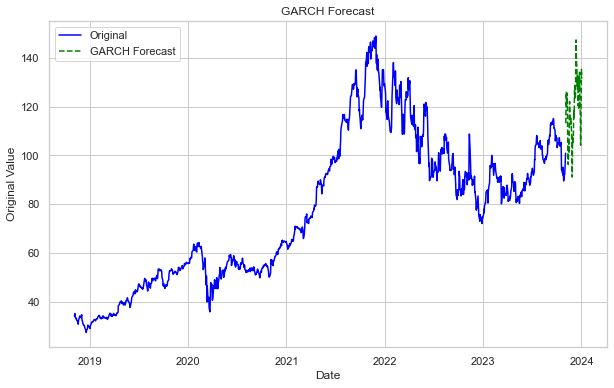

In [138]:
# Plot the original time series and GARCH forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original', color='blue')
plt.plot(forecast_df_garch['Date'], forecast_df_garch['Forecast_GARCH'], label='GARCH Forecast', color='green', linestyle='dashed')
plt.title('GARCH Forecast')
plt.xlabel('Date')
plt.ylabel('Original Value')
plt.legend()
plt.show()

In [144]:
# AIC and BIC for ARIMA model 0,1,1
arima_aic = best_model.aic
arima_bic = best_model.bic


# AIC and BIC for GARCH model
garch_aic = garch_results.aic
garch_bic = garch_results.bic

# Print the results
print("ARIMA Model (0,1,1) AIC:", arima_aic)
print("ARIMA Model (0,1,1) BIC:", arima_bic)

print("\nGARCH Model AIC:", garch_aic)
print("GARCH Model BIC:", garch_bic)


ARIMA Model (0,1,1) AIC: 5556.1149751791945
ARIMA Model (0,1,1) BIC: 5566.386349873251

GARCH Model AIC: 8192.157228234075
GARCH Model BIC: 8221.633685157032


## These are our best Models :
### 1. ARIMA (0,1,1)
### 2. GARCH (1,1)

## Conclusion
In summary, our exploration of Blackstone's stock data revealed key trends and patterns, enabling us to select the optimal ARIMA (1,1,0) model for accurate forecasting. Additionally, GARCH (1,1) provided insights into stock volatility. This project equips stakeholders with valuable tools for understanding historical market behavior and making informed decisions in the dynamic landscape of financial markets. The ARIMA model's efficacy in capturing dependencies and the volatility analysis with GARCH contribute to a comprehensive framework for navigating future market fluctuations and enhancing financial decision-making.